# Star Wars survey
---
## Introdusing the dataset

We'll be working with the dataset that contains responces from Star Wars survey. It is available at [FiveThirtyEight GuiHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey). TheY've surveyed it while waiting for "Star Wars: The Force Awakens" release.

Let's take a quick look at this data.

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

The data has several name columns, like:
* `RespondentID` - An anonymized ID for the respondent (person taking the survey)
* `Gender` - The respondent's gender
* `Age` - The respondent's age
* `Household Income` - The respondent's income
* `Education` - The respondent's education level
* `Location (Census Region)` - The respondent's location
* `Have you seen any of the 6 films in the Star Wars franchise?` - Has a Yes or No response
* `Do you consider yourself to be a fan of the Star Wars film franchise?` - Has a Yes or No respon

There are also a lot unnamed columns. It's due to the respondent had to check one or more boxes for some questions.

Let's make some cleansing next.

## Converting to boolean

There are to columns that represent yes/no questions, which are:
* Have you seen any of the 6 films in the Star Wars franchise?
* Do you consider yourself to be a fan of the Star Wars film franchise?

Now it contains string values `Yes`, `No` and also `Nan`. The smart move would be to convert these values to boolean to perform further analysis. So let's do it.

In [3]:
yes_no = {"Yes": True, "No": False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no, na_action='ignore')
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no, na_action='ignore')

print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

We successfully replaced all the values. Move on!

## Checkbox questions

The next six columns represent a single checkbox question:
* `Which of the following Star Wars films have you seen? Please select all that apply`. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
* `Unnamed: 4` - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
* `Unnamed: 5` - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
* `Unnamed: 6` - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
* `Unnamed: 7` - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
* `Unnamed: 8` - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

Fist of all let's rgive unnamed columns some clear names.

In [4]:
col_map = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
          'Unnamed: 4': 'seen_2',
          'Unnamed: 5': 'seen_3',
          'Unnamed: 6': 'seen_4',
          'Unnamed: 7': 'seen_5',
          'Unnamed: 8': 'seen_6'}
star_wars.rename(columns=col_map, inplace=True)

Now let's convert values in these columns to boolean like we did before.

In [5]:
import numpy as np
bool_map = {"Star Wars: Episode I  The Phantom Menace": True,
           'Star Wars: Episode II  Attack of the Clones': True,
           'Star Wars: Episode III  Revenge of the Sith': True,
           'Star Wars: Episode IV  A New Hope': True,
           'Star Wars: Episode V The Empire Strikes Back': True,
           'Star Wars: Episode VI Return of the Jedi': True,
           np.nan: False}

for i in range(1, 7):
    col_name = 'seen_' + str(i)
    star_wars[col_name] = star_wars[col_name].map(bool_map)
    
star_wars.iloc[:, 3:9].head()    

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True


Looks like we are doing okay. But there are another 6 columns that represent checkbox:
* `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked Star Wars: Episode I The Phantom Menace
* `Unnamed: 10` - How much the respondent liked Star Wars: Episode II Attack of the Clones
* `Unnamed: 11` - How much the respondent liked Star Wars: Episode III Revenge of the Sith
* `Unnamed: 12` - How much the respondent liked Star Wars: Episode IV A New Hope
* `Unnamed: 13` - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
* `Unnamed: 14` - How much the respondent liked Star Wars: Episode VI Return of the Jedi

These columns contain values from 1 to 6 tha means personal rank for each episode. Let's convert values from string to numeric and rename columns as well.

In [6]:
rat_col_map = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
          'Unnamed: 10': 'ranking_2',
          'Unnamed: 11': 'ranking_3',
          'Unnamed: 12': 'ranking_4',
          'Unnamed: 13': 'ranking_5',
          'Unnamed: 14': 'ranking_6'}
star_wars.rename(columns=rat_col_map, inplace=True)

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars.iloc[:, 9:15].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0


That's done. Now we can start some analysys.

## Most rated episode

The easiest way to represent episode with the highest score let's build bar plot for mean rank values.

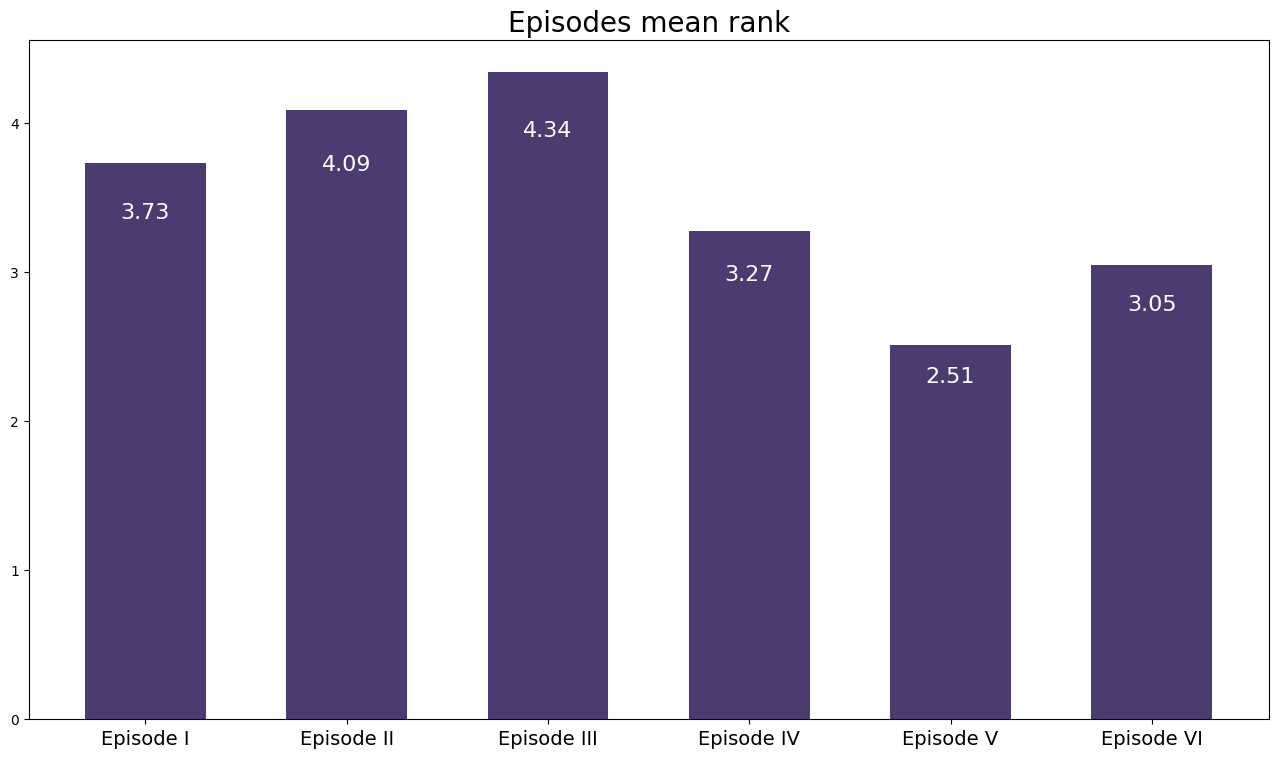

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
episodes = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']
rank_cols = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']

fig, ax = plt.subplots(figsize=(16, 9))
rank_bars = ax.bar(rank_cols, star_wars[rank_cols].mean(), width=0.6, color='#4c3b71')

ax.set_xticklabels(episodes, fontsize=14)
ax.set_title('Episodes mean rank', fontsize=20)

def add_labels(ax, bars):
    #add labels at the top of each bar
    for bar in bars:
        ax.text(bar.get_x()+bar.get_width()/2, (bar.get_height()*0.9), round(bar.get_height(), 2),
                horizontalalignment='center', color='white', fontsize=16)
        
add_labels(ax, rank_bars)

It seems older episodes are more popular. Probably respondent might think that new trilogy lost saga spirit, exchanged it for effects, graphics etc. Original trilogy is true but new one was made for money.

The most unpopular episode is **"Revenge of the Sith"**. It is supposed to be saga culmination, connection between two trilogies. This resault is quite unexpected for me. But hardcore fans might think other way, maybe they disliked how all was explaned.

The most popular episode is **"The Empire Strikes Back"**. It is second released episode and it has [huge plot twist](https://lh4.googleusercontent.com/TQEYCj9TWWXlJMf5mgTBvEUYrQk5uz-wrIX_M6v8DRLk4ef-FYgsuAIaBO_lVNOVKAzG76dn3sToUspG-OeDmrHQAMZvKvku42Pa6b1R6KRWesauFAX76eWSjDNTLDF1RspszZ0q). Probably for this dramatic scene everyone likes this episode. And also for Hoth battle ( ͡° ͜ʖ ͡°)

## Most seen episode

Now let's find out most seen episode.

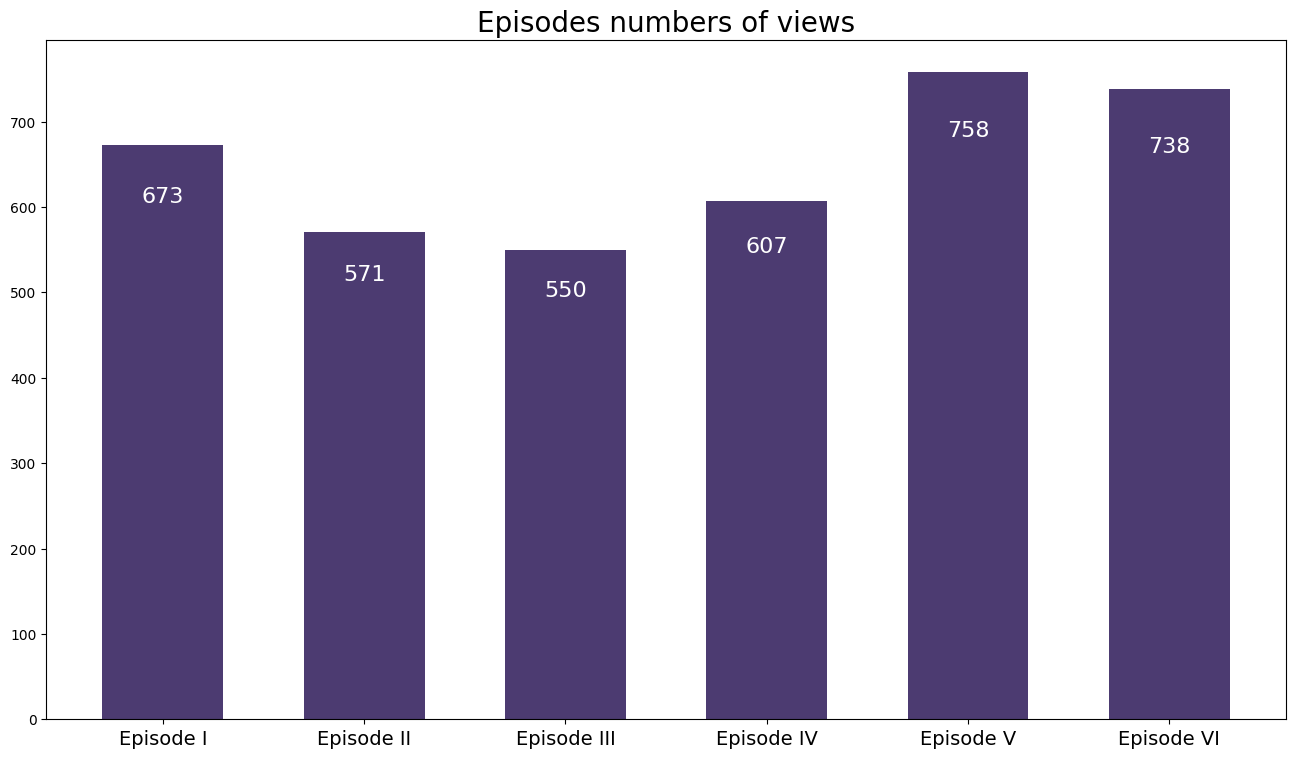

In [19]:
seen_cols = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']

fig2, ax2 = plt.subplots(figsize=(16, 9))
seen_bars = ax2.bar(seen_cols, star_wars[seen_cols].sum(), width=0.6, color='#4c3b71')

ax2.set_xticklabels(episodes, fontsize=14)
ax2.set_title('Episodes numbers of views', fontsize=20)

add_labels(ax2, seen_bars)

This plot correlate with the previous one. Top rank episode which is **"The Empire Strikes Back"** has the most numbers of views. Also **"Revenge of the Sith"**, the most unpopuler one has the lowest numbers of views.

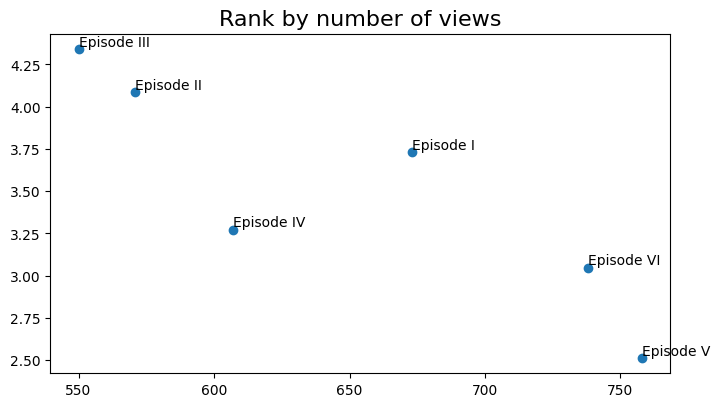

In [9]:
seen_sum = star_wars[seen_cols].sum()
rank_mean = star_wars[rank_cols].mean()

fig3, ax3 = plt.subplots(figsize=(8, 4.5))
sct_ep = ax3.scatter(star_wars[seen_cols].sum(), star_wars[rank_cols].mean())
ax3.set_title('Rank by number of views', fontsize=16)
for i in range(0, 6):
    ax3.text(seen_sum[i], rank_mean[i], episodes[i], verticalalignment='bottom',
            horizontalalignment='left', fontsize=10)

Looks like this correlation works for almost all episodes. So probably respondents rank original trilogy highter just because they've seen it and vice versa.

Only first episode is out of this coorelation. Maybe it is because this is the first episode from the new trilogy so everyone was waiting for it and watched than. But it wasn't good as was expected.

## Gender influence

We can split our dataframe into two groups based on gender and then repeat previous analysys. There are maybe some intresting patterns.

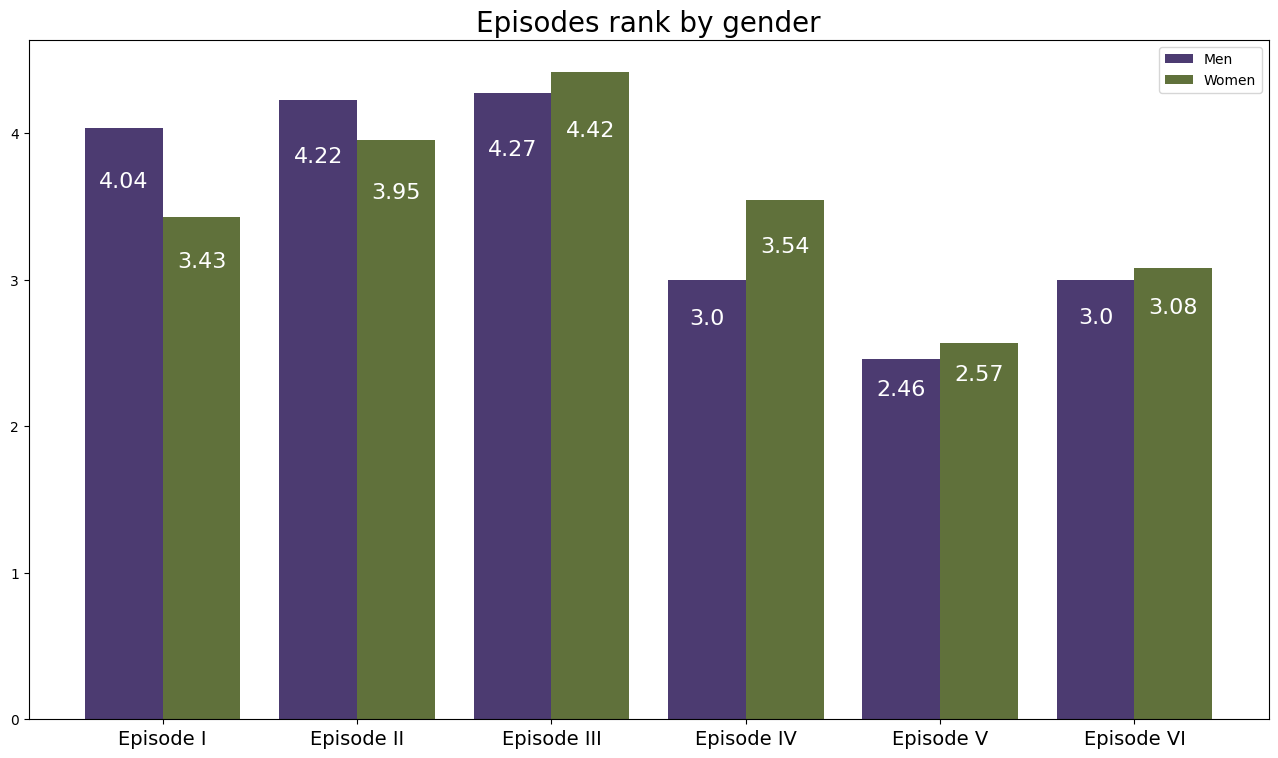

In [28]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

x_coords = np.arange(6)

fig4, ax4 = plt.subplots(figsize=(16, 9))

male_rank_bars = ax4.bar(x_coords, males[rank_cols].mean(), width=0.4, color='#4c3b71')
female_rank_bars = ax4.bar(x_coords+0.4, females[rank_cols].mean(), width=0.4, color='#60713b')

ax4.set_xticks(x_coords + 0.2)
ax4.set_xticklabels(episodes, fontsize=14)
ax4.set_title('Episodes rank by gender', fontsize=20)
ax4.legend((male_rank_bars[0], female_rank_bars[0]), ('Men', 'Women'))

add_labels(ax4, male_rank_bars)
add_labels(ax4, female_rank_bars)

Rank distribution does not depend on gender, every episode took the same place. **Episode V** is on the top and **episode III** is the last one for both men and women.

But there is some difference. Men rate original trilogy slightly higher then women. And women do the same with new trilogy.

Now let's take a look at the number of views.

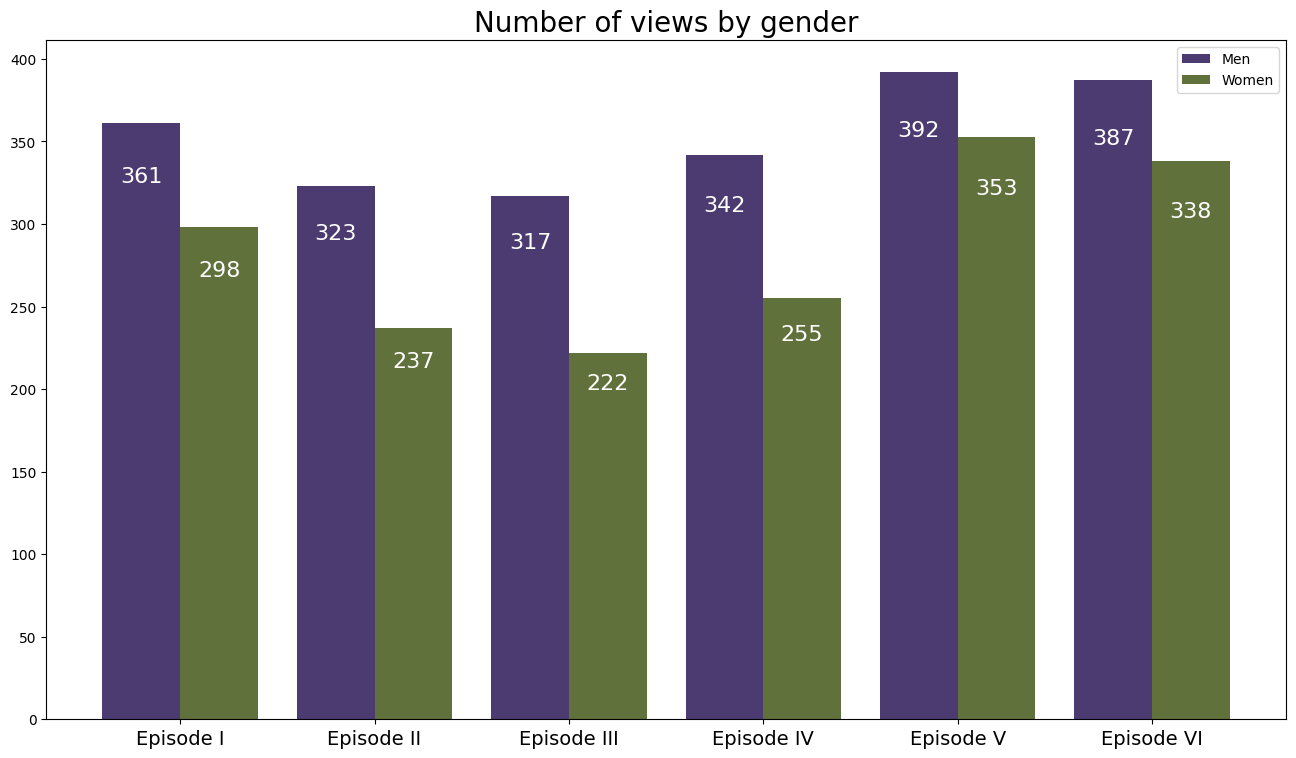

In [29]:
fig5, ax5 = plt.subplots(figsize=(16, 9))

male_seen_bars = ax5.bar(x_coords, males[seen_cols].sum(), width=0.4, color='#4c3b71')
female_seen_bars = ax5.bar(x_coords+0.4, females[seen_cols].sum(), width=0.4, color='#60713b')

ax5.set_xticks(x_coords + 0.2)
ax5.set_xticklabels(episodes, fontsize=14)
ax5.set_title('Number of views by gender', fontsize=20)
ax5.legend((male_rank_bars[0], female_rank_bars[0]), ('Men', 'Women'))

add_labels(ax5, male_seen_bars)
add_labels(ax5, female_seen_bars)

Men watch Star Wars more, especially episodes II-IV. Perhaps it's because of franchise genre.

## Star Wars fans

There was question in the survey:
* `Do you consider yourself to be a fan of the Star Wars film franchise?`

So we can explore fans impact on rank and views. Let's do it.

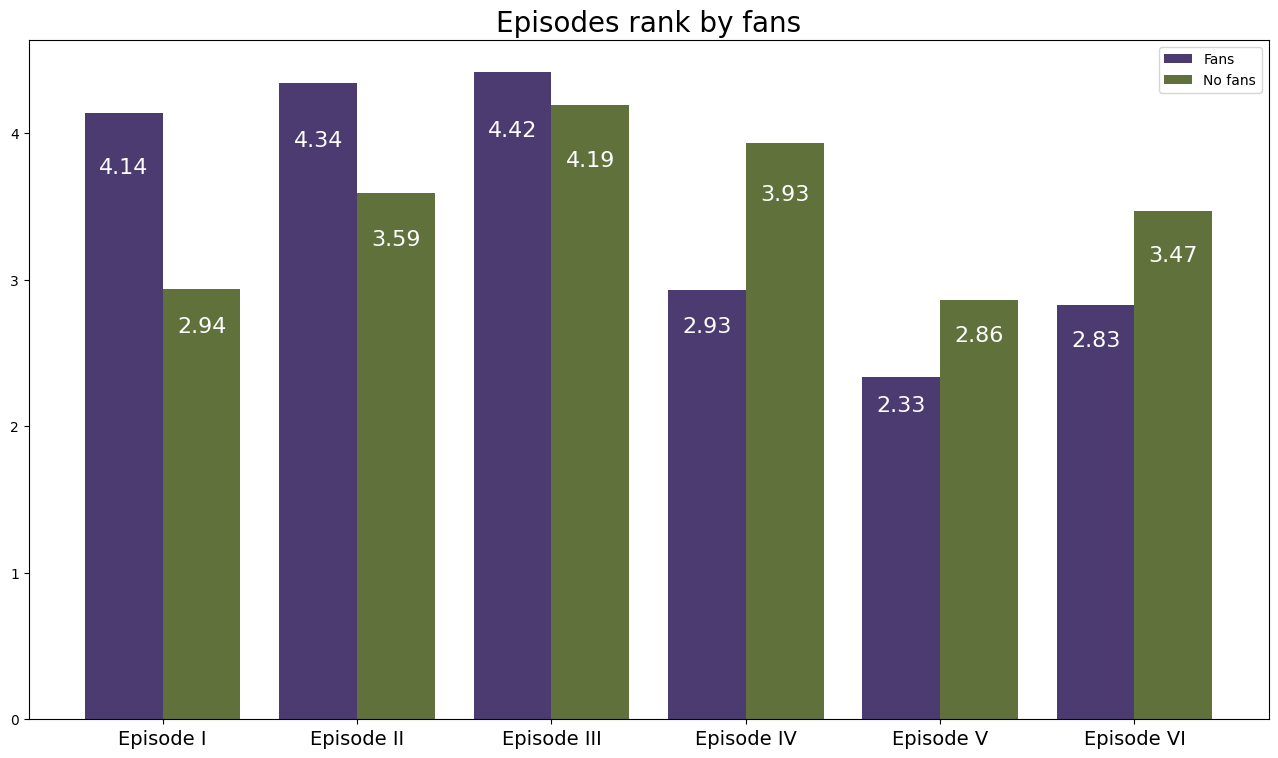

In [31]:
fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
no_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

fig6, ax6 = plt.subplots(figsize=(16, 9))

fans_bars = ax6.bar(x_coords, fans[rank_cols].mean(), width=0.4, color='#4c3b71')
no_fans_bars = ax6.bar(x_coords+0.4, no_fans[rank_cols].mean(), width=0.4, color='#60713b')

ax6.set_xticks(x_coords + 0.2)
ax6.set_xticklabels(episodes, fontsize=14)
ax6.set_title('Episodes rank by Star Wars fans', fontsize=20)
ax6.legend((fans_bars[0], no_fans_bars[0]), ('Fans', 'No fans'))

add_labels(ax6, fans_bars)
add_labels(ax6, no_fans_bars)

Fans clearly like original trilogy more and it was expected. No fans rank spread is diiferent but there is one intresting detail. both of them put **episode V** on the first place and **episode III** on the last.

Now we'll check number of views.

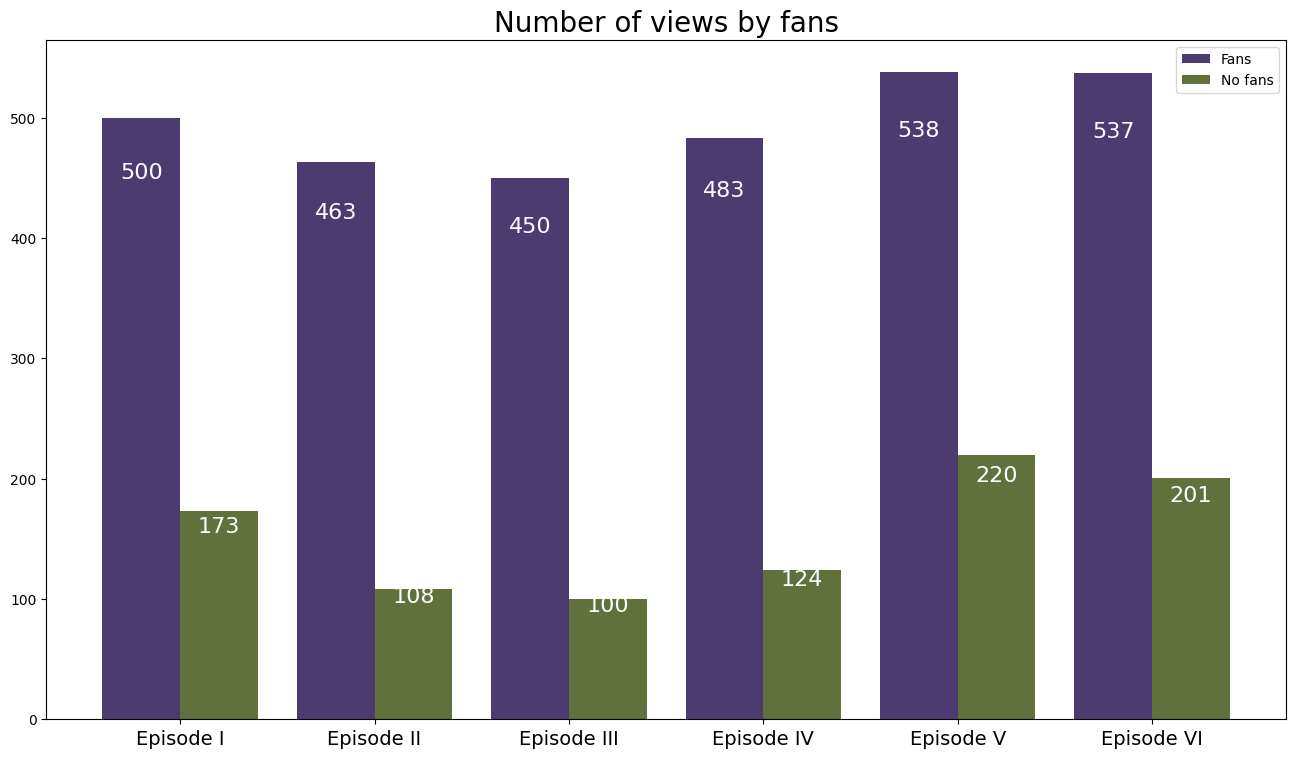

In [33]:
fig7, ax7 = plt.subplots(figsize=(16, 9))

fans_views_bars = ax7.bar(x_coords, fans[seen_cols].sum(), width=0.4, color='#4c3b71')
no_fans_views_bars = ax7.bar(x_coords+0.4, no_fans[seen_cols].sum(), width=0.4, color='#60713b')

ax7.set_xticks(x_coords + 0.2)
ax7.set_xticklabels(episodes, fontsize=14)
ax7.set_title('Number of views by Star Wars fans', fontsize=20)
ax7.legend((fans_views_bars[0], no_fans_views_bars[0]), ('Fans', 'No fans'))

add_labels(ax7, fans_views_bars)
add_labels(ax7, no_fans_views_bars)

There is no surprise - huge gap between fans and no fans. But distribution by episodes is the same for both groups.

## Star Trek fans

We also can split respondents by their relation with Star Trek franchise. There was question:
* `Do you consider yourself to be a fan of the Star Trek franchise?`

Let's use the answers and build another two bar plots.

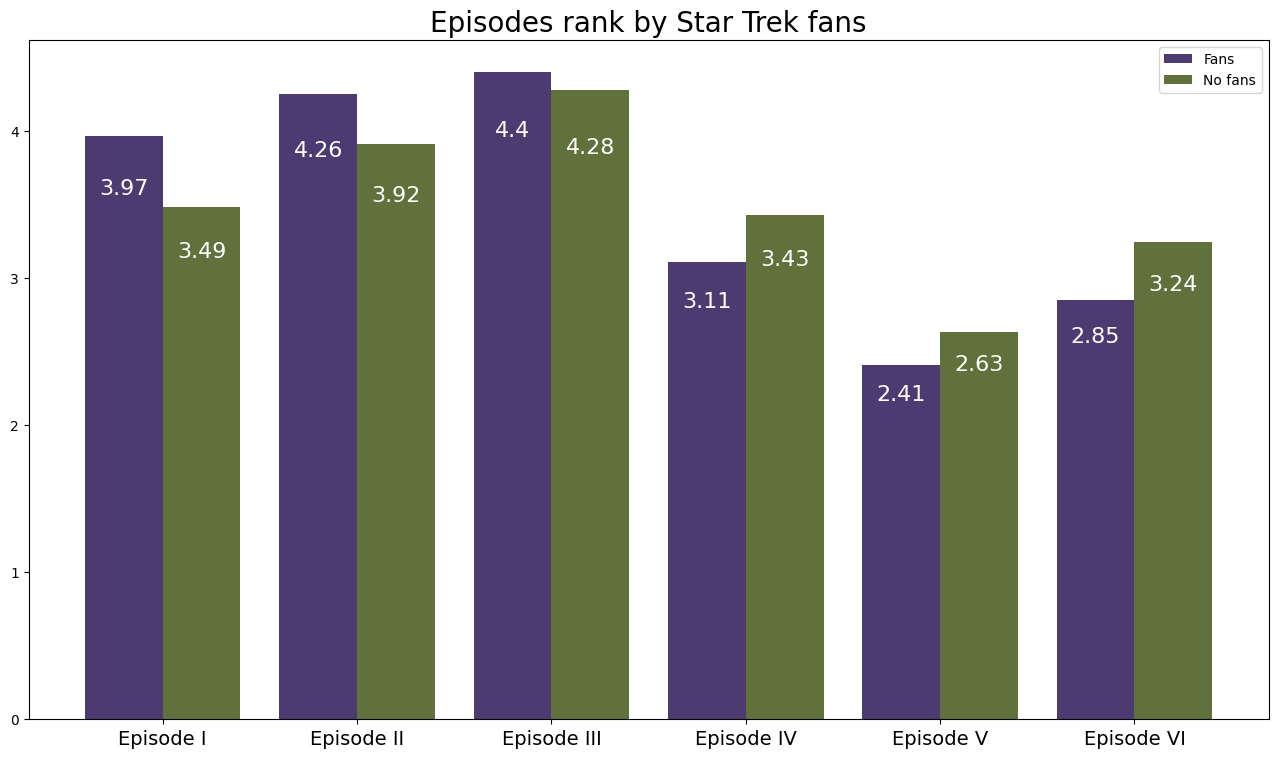

In [35]:
st_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == 'Yes']
no_st_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == 'No']

fig7, ax7 = plt.subplots(figsize=(16, 9))

st_fans_bars = ax7.bar(x_coords, st_fans[rank_cols].mean(), width=0.4, color='#4c3b71')
no_st_fans_bars = ax7.bar(x_coords+0.4, no_st_fans[rank_cols].mean(), width=0.4, color='#60713b')

ax7.set_xticks(x_coords + 0.2)
ax7.set_xticklabels(episodes, fontsize=14)
ax7.set_title('Episodes rank by Star Trek fans', fontsize=20)
ax7.legend((st_fans_bars[0], no_st_fans_bars[0]), ('Fans', 'No fans'))

add_labels(ax7, st_fans_bars)
add_labels(ax7, no_st_fans_bars)

Star Trek fand rate higher original trilogy then the new one. Probably they prefer old good sci-fi like Star Wars fans.

But stil leader is **episode V** and outsider is **episode III**.

Let's go to the number of views.

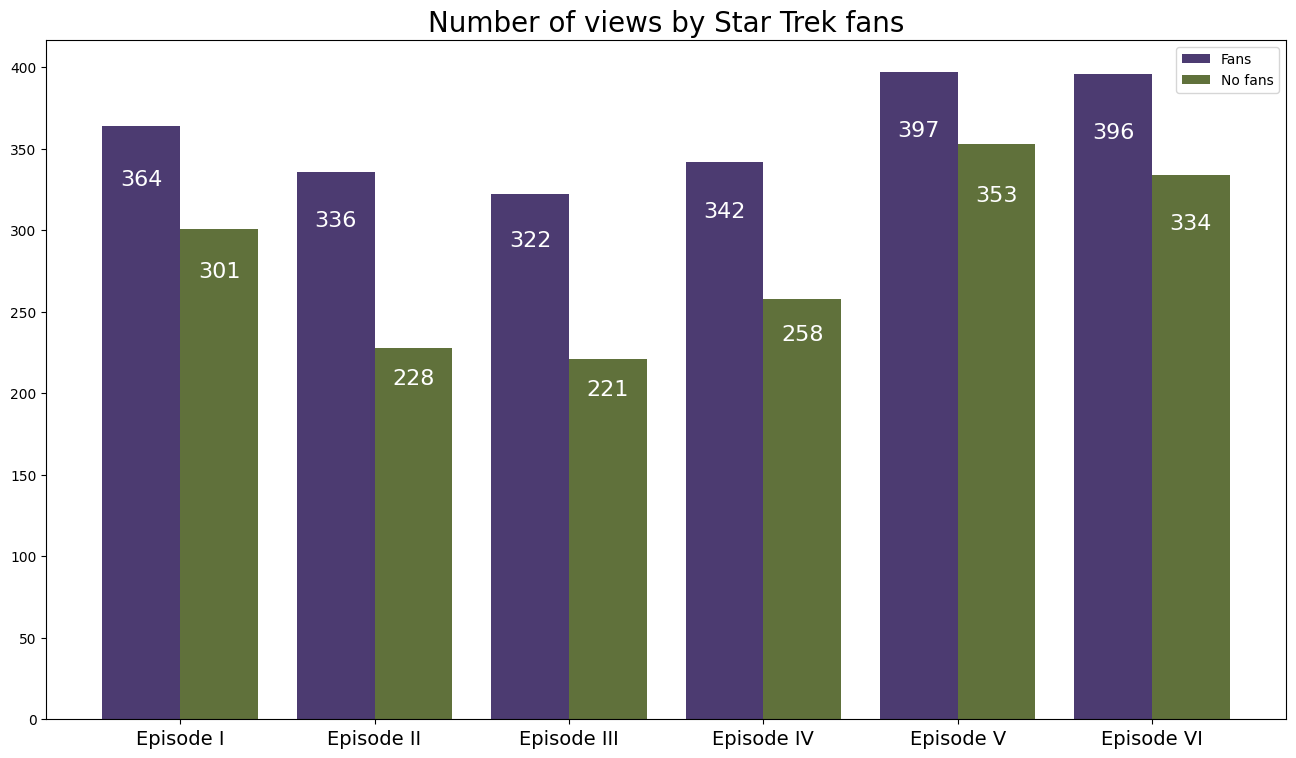

In [37]:
fig8, ax8 = plt.subplots(figsize=(16, 9))

st_fans_views = ax8.bar(x_coords, st_fans[seen_cols].sum(), width=0.4, color='#4c3b71')
no_st_fans_views = ax8.bar(x_coords+0.4, no_st_fans[seen_cols].sum(), width=0.4, color='#60713b')

ax8.set_xticks(x_coords + 0.2)
ax8.set_xticklabels(episodes, fontsize=14)
ax8.set_title('Number of views by Star Trek fans', fontsize=20)
ax8.legend((st_fans_views[0], no_st_fans_views[0]), ('Fans', 'No fans'))

add_labels(ax8, st_fans_views)
add_labels(ax8, no_st_fans_views)

The gap between Star Trek fans and no fans is lower than it was with Star Wars fans. But being Star Trek fan increase chance to watch Star Wars movies.

## Conclusions

We explored dataset in general and also considering three factors that may impact on survey results:
* Respondents gender
* Do respondents a Star Wars fans or not
* Do respondents a Star Trek fans or not

There were found some influence that brings each factor. Like strong and obvious correlation between being Star Wars fan and number of views.

But the most exciting thing is the same rank and views ditribution between episodes regardless any factor. At that way we can say for sure that:
* The most viewed and top ranked episode is **"The Empire Strikes Back"**
* The least viewed and lowest ranked episode is **"Revenge of the Sith"**